In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date

In [2]:
trans = pd.read_csv('Transactions_Cleaned.csv')
cust = pd.read_csv('CustomerDemographic_Cleaned.csv')

In [3]:
trans.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82


In [4]:
print("Total records (rows) in the Transaction Dataset : {}".format(trans.shape[0]))
print("Total features (columns) in the Transaction Dataset : {}".format(trans.shape[1]))

Total records (rows) in the Transaction Dataset : 19803
Total features (columns) in the Transaction Dataset : 14


In [5]:
cust.head(5)

,customer_id,first_name,last_name,gender,age,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,64,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,37,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,63,61,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,56,33,Missing,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,40,56,Senior Editor,Missing,Affluent Customer,N,Yes,8.0


In [6]:
print("Total records (rows) in the Transaction Dataset : {}".format(cust.shape[0]))
print("Total features (columns) in the Transaction Dataset : {}".format(cust.shape[1]))

Total records (rows) in the Transaction Dataset : 3912
Total features (columns) in the Transaction Dataset : 12


In [7]:
# Merging both the Transaction Dataset and Customer Demographics Dataset based on customer_id.

merged_trans_cust = pd.merge(trans, cust, left_on = 'customer_id', right_on = 'customer_id', how = 'inner')

In [8]:
merged_trans_cust.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,last_name,gender,age,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Anthony,Male,63,19,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Anthony,Male,63,19,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Anthony,Male,63,19,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,O'Donnell,Female,38,89,Clinical Specialist,Health,Mass Customer,N,Yes,10.0
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,O'Donnell,Female,38,89,Clinical Specialist,Health,Mass Customer,N,Yes,10.0


In [9]:
print("Total records (rows) in the Merged Dataset : {}".format(merged_trans_cust.shape[0]))
print("Total features (columns) in the Merged Dataset : {}".format(merged_trans_cust.shape[1]))

Total records (rows) in the Merged Dataset : 19354
Total features (columns) in the Merged Dataset : 25


In [10]:
merged_trans_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19354 entries, 0 to 19353
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19354 non-null  int64  
 1   product_id                           19354 non-null  int64  
 2   customer_id                          19354 non-null  int64  
 3   transaction_date                     19354 non-null  object 
 4   online_order                         19354 non-null  float64
 5   order_status                         19354 non-null  object 
 6   brand                                19354 non-null  object 
 7   product_line                         19354 non-null  object 
 8   product_class                        19354 non-null  object 
 9   product_size                         19354 non-null  object 
 10  list_price                           19354 non-null  float64
 11  standard_cost               

**The data-type of transaction_date column is not in date-time format. Hence the data-type of the column should be changed from object to datetime type.**

In [11]:
merged_trans_cust['transaction_date'] = pd.to_datetime(merged_trans_cust['transaction_date'])

# 1. RFM Analysis

RFM (Recency, Frequency, Monetary) analysis categorizes customers based on their buying behavior. It segments them by how recently they made a purchase, how often they buy, and how much they spend. This approach helps businesses identify high-value customers, including those who spend a lot but may not purchase frequently. Additionally, RFM analysis supports managers in creating tailored promotional campaigns.

- Recency (R): Days since the last purchase.
- Frequency (F): Total number of purchases.
- Monetary Value (M): Total spending amount.

In [12]:
# Maximum Transaction Date or the latest transaction date.

max_trans_date = max(merged_trans_cust['transaction_date']).date()
max_trans_date

datetime.date(2017, 12, 30)

In [13]:
# Taking the last transaction date as a reference date for comparision and 
# Finding the number of days between a transaction date and last transaction date to compute the recency.

comparison_date = datetime.strptime(str(max_trans_date), "%Y-%m-%d")

In [14]:
rfm_table = merged_trans_cust.groupby(['customer_id']).agg({'transaction_date': lambda date : (comparison_date - date.max()).days,
                                                            'product_id' : lambda prod_id : len(prod_id), 
                                                            'profit' : lambda p : sum(p)})

In [15]:
# The columns in rfm_table dataframe are not properly named. Renaming of the columns to appropiate name is needed

rfm_table.columns

Index(['transaction_date', 'product_id', 'profit'], dtype='object')

In [16]:
# Renaming column names to appropiate names

rfm_table.rename(columns = {'transaction_date' : 'recency', 'product_id' : 'frequency', 'profit' : 'monetary'}, inplace = True)

In [17]:
# Dividing the recency, frequency and monetary into 4 quartiles (min, 25%, 50%, 75% and max).
# These values will help us to calculate RFM score for a customer and classify based on their RFM score.

rfm_table['r_quartile'] = pd.qcut(rfm_table['recency'], 4, ['4','3','2','1'])
rfm_table['f_quartile'] = pd.qcut(rfm_table['frequency'], 4, ['1', '2', '3', '4'])
rfm_table['m_quartile'] = pd.qcut(rfm_table['monetary'], 4, ['1', '2', '3', '4'])

In [18]:
rfm_table

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
customer_id,,,,,,
1,7,11,3018.09,4,4,3
2,128,3,2226.26,1,1,2
3,102,8,3362.81,1,4,3
4,195,2,220.57,1,1,1
5,16,6,2394.94,4,2,2
...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2
3497,52,3,1648.32,2,1,1
3498,127,6,3147.33,1,2,3


In [19]:
# Caluclation of RFM Score.
# Max weightage is given to recency then frequency and then  monetary.

rfm_table['rfm_score'] = 100 * rfm_table['r_quartile'].astype(int) + 10 * rfm_table['f_quartile'].astype(int) + rfm_table['m_quartile'].astype(int)

In [20]:
# Assigning a title to a cuustomer.
# Platinum corresponds to highest range of RFM score down to Bronze to lowest range of RFM score.

rfm_table['customer_title'] = pd.qcut(rfm_table['rfm_score'], 4, ['Bronze', 'Silver', 'Gold', 'Platinum'])

In [21]:
rfm_table

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title
customer_id,,,,,,,,
1,7,11,3018.09,4,4,3,443,Platinum
2,128,3,2226.26,1,1,2,112,Bronze
3,102,8,3362.81,1,4,3,143,Bronze
4,195,2,220.57,1,1,1,111,Bronze
5,16,6,2394.94,4,2,2,422,Platinum
...,...,...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2,112,Bronze
3497,52,3,1648.32,2,1,1,211,Bronze
3498,127,6,3147.33,1,2,3,123,Bronze


## Merging both RFM Table with Transaction and Customer Tables

The **RFM_Table** dataframe is merged with the **Transactions** and **Customer Demographics** datasets, to gain depper insights of Customer Segemnts along with transactions. The dataframes are joined based on **'customer_id'** from both the datasets.

In [22]:
cust_trans_rfm = pd.merge(merged_trans_cust, rfm_table, left_on = 'customer_id', right_on = 'customer_id', how = 'inner')

In [23]:
cust_trans_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19354 entries, 0 to 19353
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19354 non-null  int64         
 1   product_id                           19354 non-null  int64         
 2   customer_id                          19354 non-null  int64         
 3   transaction_date                     19354 non-null  datetime64[ns]
 4   online_order                         19354 non-null  float64       
 5   order_status                         19354 non-null  object        
 6   brand                                19354 non-null  object        
 7   product_line                         19354 non-null  object        
 8   product_class                        19354 non-null  object        
 9   product_size                         19354 non-null  object        
 10  list_price

**The datatypes of the columns looks fine.**

## Creating an Age Group Feature

In [24]:
cust_trans_rfm['age_group'] = cust_trans_rfm['age'].apply(lambda x : (math.floor(x/10)+1)*10)

## Creating a Detail Customer title / tag based on RFM Score

An extended version of customer title is made which divides the entire number of customers into 11 groups. The groups are mainly Platinum Customers, Very Loyal, Becoming Loyal, Recent Customers, Potential Customers, Late Bloomer, Loosing Customers, High Risk Customers, Almost Lost Customers, Evasive Customers and Lost Customers.
The demarkation of customers into the above mentioned groups is based on their RFM scores.

In [25]:
# Function as a lookup to appropiate customer titles based on RFM score.

def cust_score_title_lkup(cols):
    
    rfm_score = cols[0]
    
    if rfm_score >= 444:
        return 'Platinum Customer'
    elif rfm_score >=433 and rfm_score < 444:
        return 'Very Loyal'
    elif rfm_score >=421 and rfm_score < 433:
        return 'Becoming Loyal'
    elif rfm_score >=344 and rfm_score < 421:
        return 'Recent Customer'
    elif rfm_score >=323 and rfm_score < 344:
        return 'Potential Customer'
    elif rfm_score >=311 and rfm_score < 323:
        return 'Late Bloomer'
    elif rfm_score >=224 and rfm_score < 311:
        return 'Loosing Customer'
    elif rfm_score >=212 and rfm_score < 224:
        return 'High Risk Customer'
    elif rfm_score >=124 and rfm_score < 212:
        return 'Almost Lost Customer'
    elif rfm_score >=112 and rfm_score < 124:
        return 'Evasive Customer'
    else :
        return 'Lost Customer'

In [26]:
# Applying the cust_score_title_lkup function to the rfm_score column and creating a new column 'detail_cust_title'

cust_trans_rfm['detail_cust_title']=cust_trans_rfm[['rfm_score']].apply(cust_score_title_lkup, axis=1)

C:\Users\adamy\AppData\Local\Temp\ipykernel_19296\1375572388.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rfm_score = cols[0]


In [27]:
# Display the updated DataFrame

cust_trans_rfm[['rfm_score', 'detail_cust_title']]

,rfm_score,detail_cust_title
0,211,Almost Lost Customer
1,211,Almost Lost Customer
2,211,Almost Lost Customer
3,334,Potential Customer
4,334,Potential Customer
...,...,...
19349,114,Evasive Customer
19350,114,Evasive Customer
19351,114,Evasive Customer
19352,114,Evasive Customer


In [28]:
# Function to provide ranks to the customers based on their title.

def get_rank(cols):
    
    title = cols[0]
    
    if title=='Platinum Customer':
        return 1
    elif title=='Very Loyal':
        return 2
    elif title == 'Becoming Loyal':
        return 3
    elif title == 'Recent Customer':
        return 4
    elif title=='Potential Customer':
        return 5
    elif title == 'Late Bloomer':
        return 6
    elif title == 'Loosing Customer':
        return 7
    elif title=='High Risk Customer':
        return 8
    elif title == 'Almost Lost Customer':
        return 9
    elif title == 'Evasive Customer':
        return 10
    else :
        return 11

In [29]:
# Applying the above functions and creating a new feature rank

cust_trans_rfm['rank']=cust_trans_rfm[['detail_cust_title']].apply(get_rank, axis=1)

C:\Users\adamy\AppData\Local\Temp\ipykernel_19296\782112168.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  title = cols[0]


In [30]:
# Display the updated DataFrame

cust_trans_rfm[['detail_cust_title', 'rank']]

,detail_cust_title,rank
0,Almost Lost Customer,9
1,Almost Lost Customer,9
2,Almost Lost Customer,9
3,Potential Customer,5
4,Potential Customer,5
...,...,...
19349,Evasive Customer,10
19350,Evasive Customer,10
19351,Evasive Customer,10
19352,Evasive Customer,10


In [31]:
cust_trans_rfm

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title,age_group,detail_cust_title,rank
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,3,645.99,2,1,1,211,Bronze,70,Almost Lost Customer,9
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,3,645.99,2,1,1,211,Bronze,70,Almost Lost Customer,9
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,3,645.99,2,1,1,211,Bronze,70,Almost Lost Customer,9
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,7,4179.11,3,3,4,334,Gold,40,Potential Customer,5
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,7,4179.11,3,3,4,334,Gold,40,Potential Customer,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19349,18735,45,3168,2017-02-21,1.0,Approved,Solex,Standard,medium,medium,...,4,5170.51,1,1,4,114,Bronze,50,Evasive Customer,10
19350,18789,83,3168,2017-04-11,0.0,Approved,Solex,Touring,medium,large,...,4,5170.51,1,1,4,114,Bronze,50,Evasive Customer,10
19351,19113,3,3168,2017-06-03,0.0,Approved,Trek Bicycles,Standard,medium,large,...,4,5170.51,1,1,4,114,Bronze,50,Evasive Customer,10
19352,19912,3,3168,2017-09-30,0.0,Approved,Trek Bicycles,Standard,medium,large,...,4,5170.51,1,1,4,114,Bronze,50,Evasive Customer,10


# 2. Exporting to CSV File

In [32]:
cust_trans_rfm.to_csv('Customer_Trans_RFM_Analysis.csv', index = False)

In [33]:
print("Total records in final dataset : {}".format(cust_trans_rfm.shape[0]))

Total records in final dataset : 19354


# 3. Data Analysis and Exploration

## 3.1. New Customer vs Old Customer Age Distributions

Most New / Old Customers are aged between 40-49. The lowest age groups are under 20 and 80+ for both Old and New Customers dataset.
Among the New Customers the most populated age bracket is 20-29 and 60-69, while the maximum Old Customers are from the age bracket 50-69.
There is a steep drop in number of customers in 30-39 age groupsd among the New Customers.

In [34]:
# Loading the New Customers Dataset

new_cust = pd.read_csv('NewCustomerList_Cleaned.csv')

C:\Users\adamy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


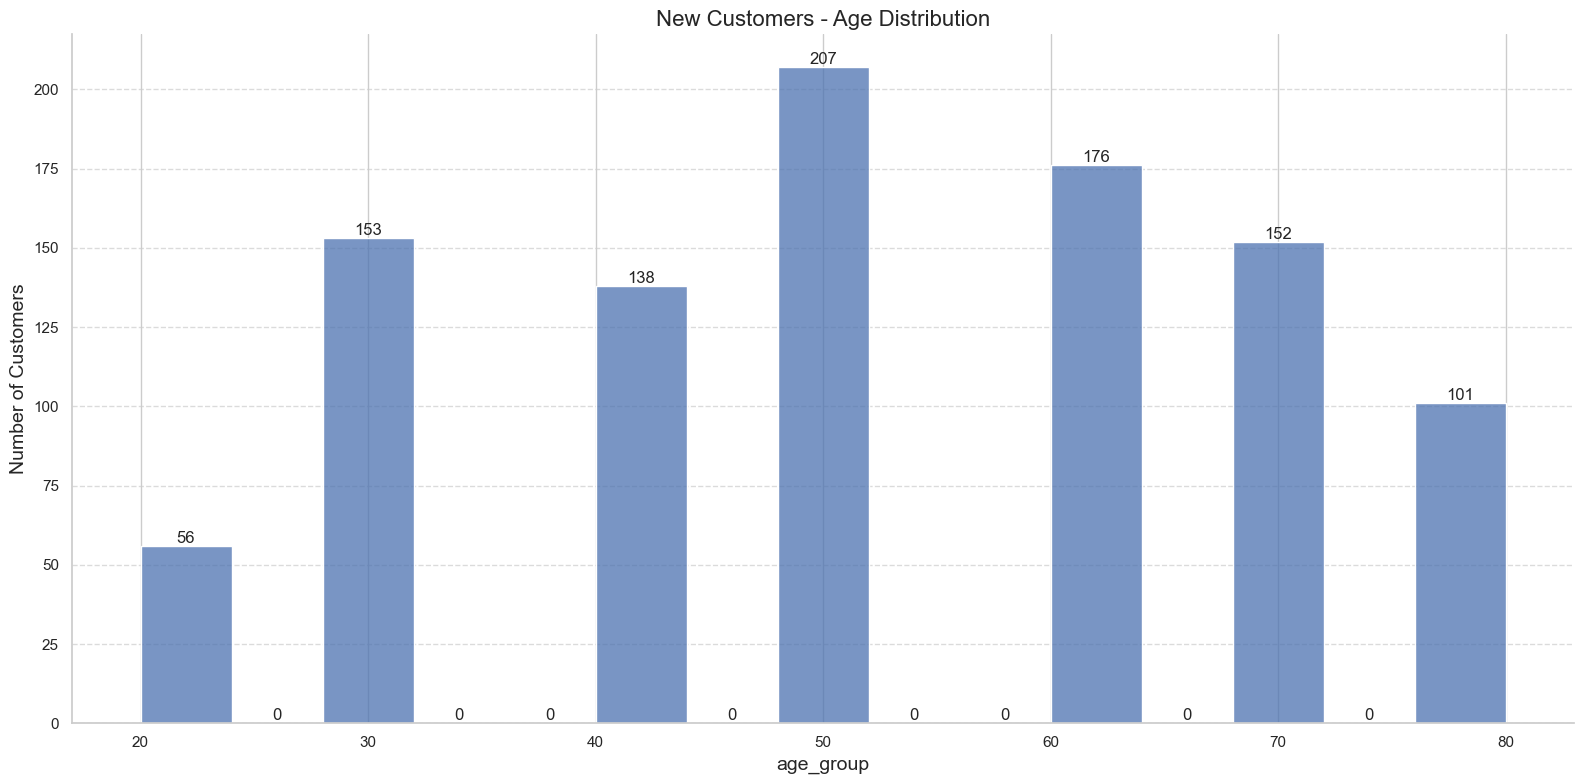

In [35]:
sns.set(style='whitegrid')

plt.figure(figsize=(16, 8))

ax = sns.histplot(new_cust['age_group'], bins=15, kde=False)

plt.xlabel('age_group', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.title('New Customers - Age Distribution', fontsize=16)

# Remove the top and right spines for a cleaner look
sns.despine()

# Add data labels above bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

# Optional: Set a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Here 20 = under 20, 30 = 20-29 age bracket.**

## 3.2 Bike related purchases over last 3 years by gender

Over the last 3 years approximately **51%** of the buyers are **women** and **49%** were **male** buyers.
**Female** purchases are approximately **10,000 more than male (numerically)**. Gender wise majority of the bike sales comes from female customers.

In [36]:
cust_bike_purchase_by_gender = cust_trans_rfm.groupby('gender').agg({'past_3_years_bike_related_purchases' : 'sum'}
                                                                 ).reset_index()

In [37]:
total_records = cust_trans_rfm['past_3_years_bike_related_purchases'].sum()

In [38]:
cust_bike_purchase_by_gender['Percent_of_total'] = (cust_bike_purchase_by_gender['past_3_years_bike_related_purchases']
                                                        /total_records)*100

In [39]:
cust_bike_purchase_by_gender

,gender,past_3_years_bike_related_purchases,Percent_of_total
0,Female,478488,50.503731
1,Male,468943,49.496269


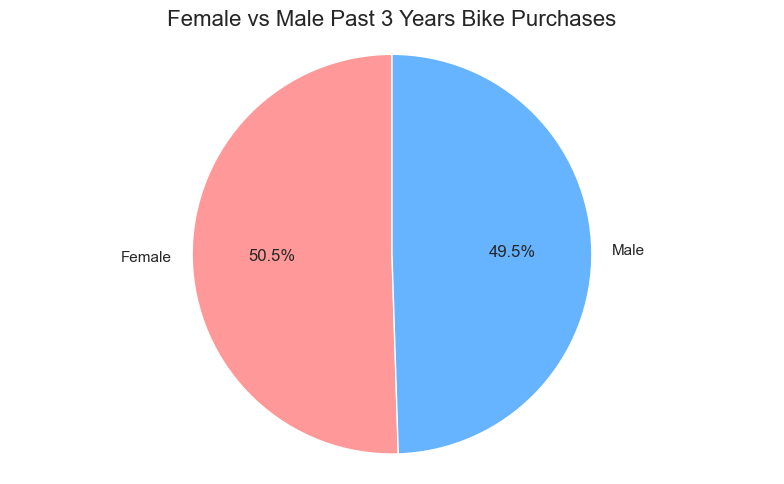

In [40]:
# Data preparation
labels = cust_bike_purchase_by_gender['gender']  # Gender categories
sizes = cust_bike_purchase_by_gender['Percent_of_total']  # Corresponding percentages
colors = ['#ff9999','#66b3ff']  # Custom colors for the pie chart

# Create the pie chart
plt.figure(figsize=(8, 5), facecolor='white')
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

# Equal aspect ratio ensures that pie chart is circular
plt.axis('equal')  
plt.title('Female vs Male Past 3 Years Bike Purchases', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

## 3.3 Job Industry Customer Distribution

Among the **New Customer**s the highest amount of sales comes from customers having a job in **Manufacturing** and **Financial services secto**r. The samllest chunk of sales comes from customers in **Agriculture sector** and from **Telecom sector** with **3%** sales only. Similar trend is observed among **Old Customers**.

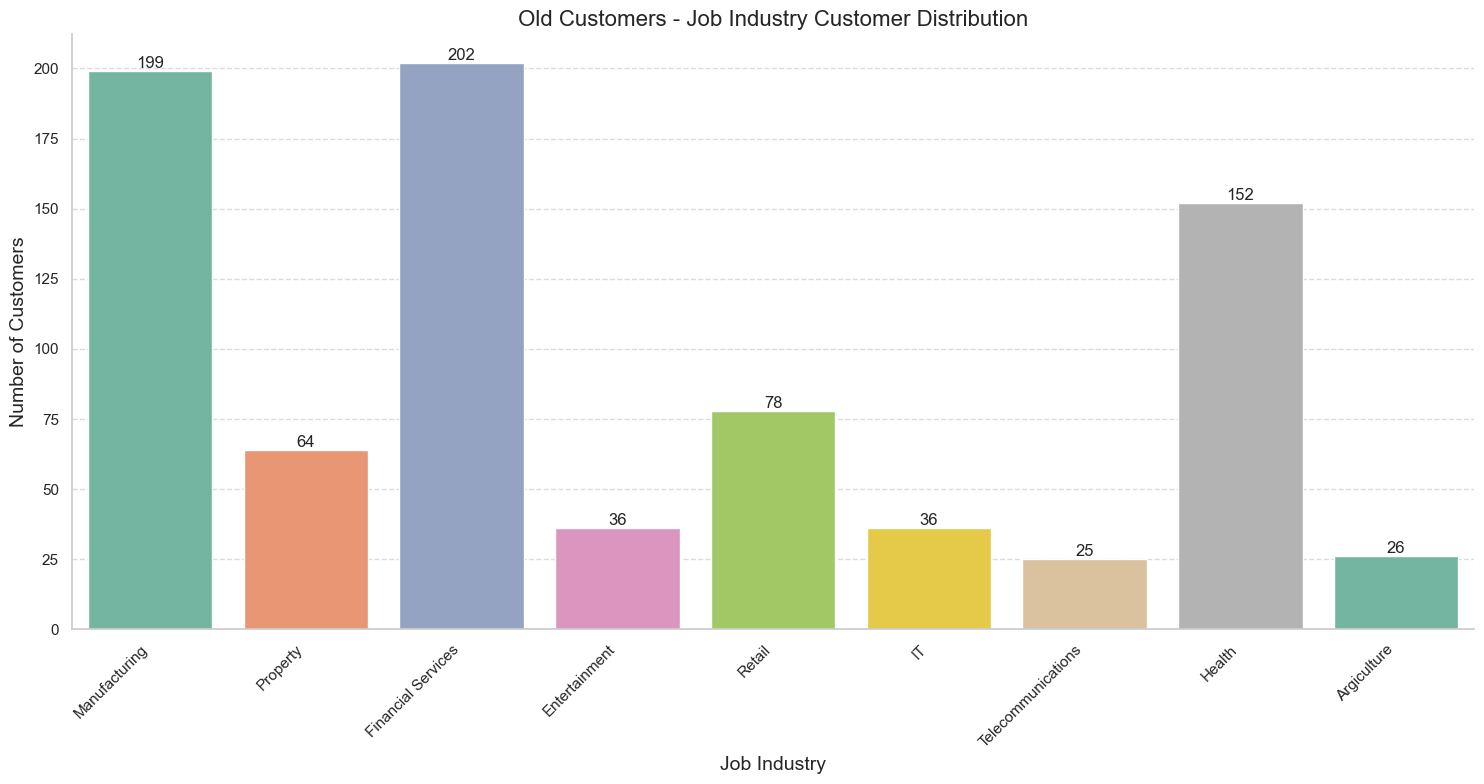

In [41]:
plt.figure(figsize=(15, 8), facecolor='white')

ax = sns.countplot(x='job_industry_category', data=new_cust[~(new_cust['job_industry_category'] == 'Missing')], palette='Set2')

plt.xlabel('Job Industry', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.title('Old Customers - Job Industry Customer Distribution', fontsize=16)

# Remove the top and right spines for a cleaner look
sns.despine()

# Add data labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Optional: Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

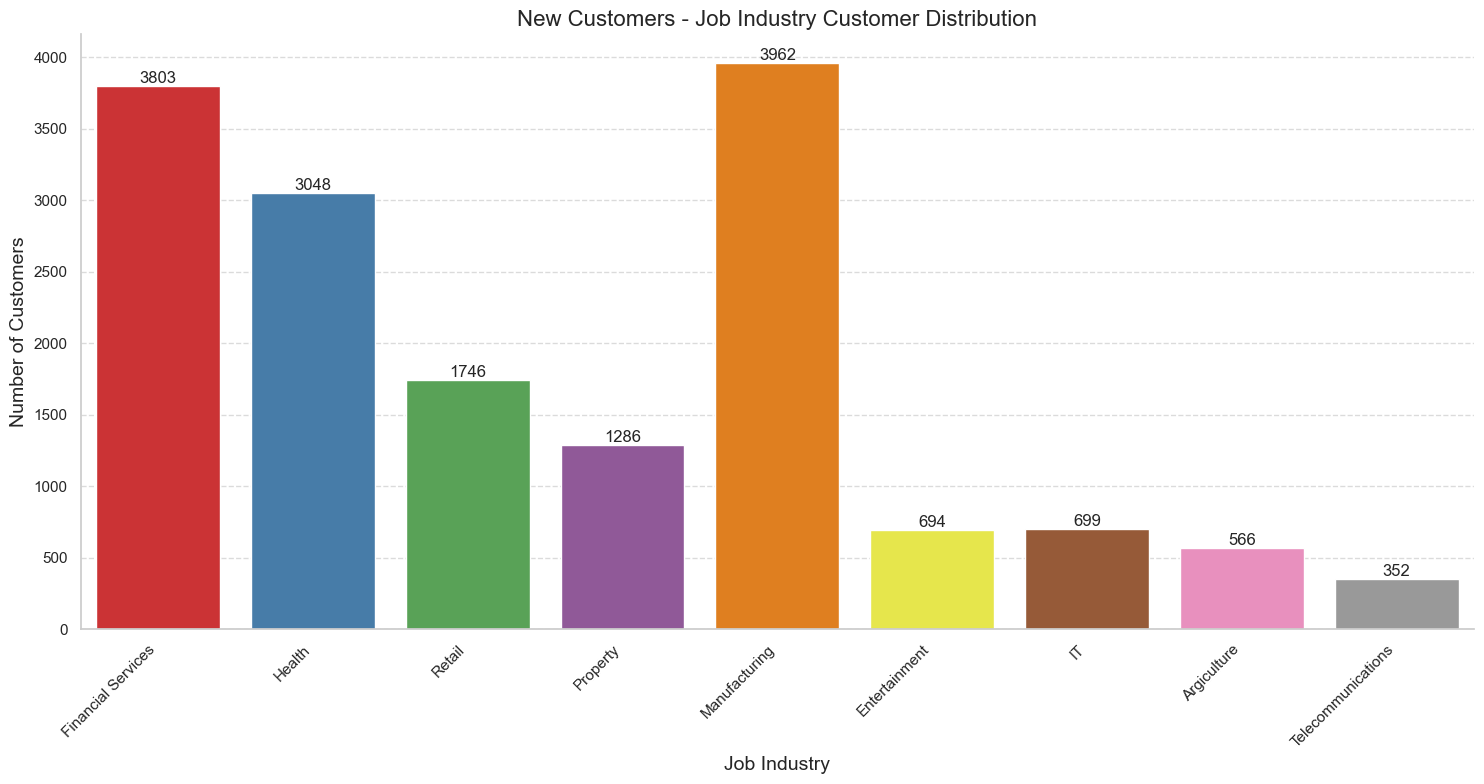

In [42]:
plt.figure(figsize=(15, 8), facecolor='white')

ax = sns.countplot(x='job_industry_category', 
                   data=cust_trans_rfm[~(cust_trans_rfm['job_industry_category'] == 'Missing')],
                   palette='Set1')  # Use a distinct color palette


plt.xlabel('Job Industry', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.title('New Customers - Job Industry Customer Distribution', fontsize=16)

# Remove the top and right spines for a cleaner look
sns.despine()

# Add data labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Optional: Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## 3.4 Wealth Segmentation by Age Group

Across all Age Groups the maximum number of customers are classified as **Mass Customers**. The next being **High Net Worth**. However among 40-49 aged customers **Affluent Customers** outperforms the **High Net Worth** customers.

### New Customers

In [43]:
wealth_age_seg_new = new_cust.groupby(['wealth_segment', 'age_group']).size().reset_index()

In [44]:
wealth_age_seg_new

,wealth_segment,age_group,0
0,Affluent Customer,20,17
1,Affluent Customer,30,39
2,Affluent Customer,40,30
3,Affluent Customer,50,50
4,Affluent Customer,60,40
5,Affluent Customer,70,40
6,Affluent Customer,80,19
7,High Net Worth,20,12
8,High Net Worth,30,43
9,High Net Worth,40,39


In [45]:
wealth_age_seg_new.rename(columns = {0 : 'number_of_customers'}, inplace = True)
wealth_age_seg_new

,wealth_segment,age_group,number_of_customers
0,Affluent Customer,20,17
1,Affluent Customer,30,39
2,Affluent Customer,40,30
3,Affluent Customer,50,50
4,Affluent Customer,60,40
5,Affluent Customer,70,40
6,Affluent Customer,80,19
7,High Net Worth,20,12
8,High Net Worth,30,43
9,High Net Worth,40,39


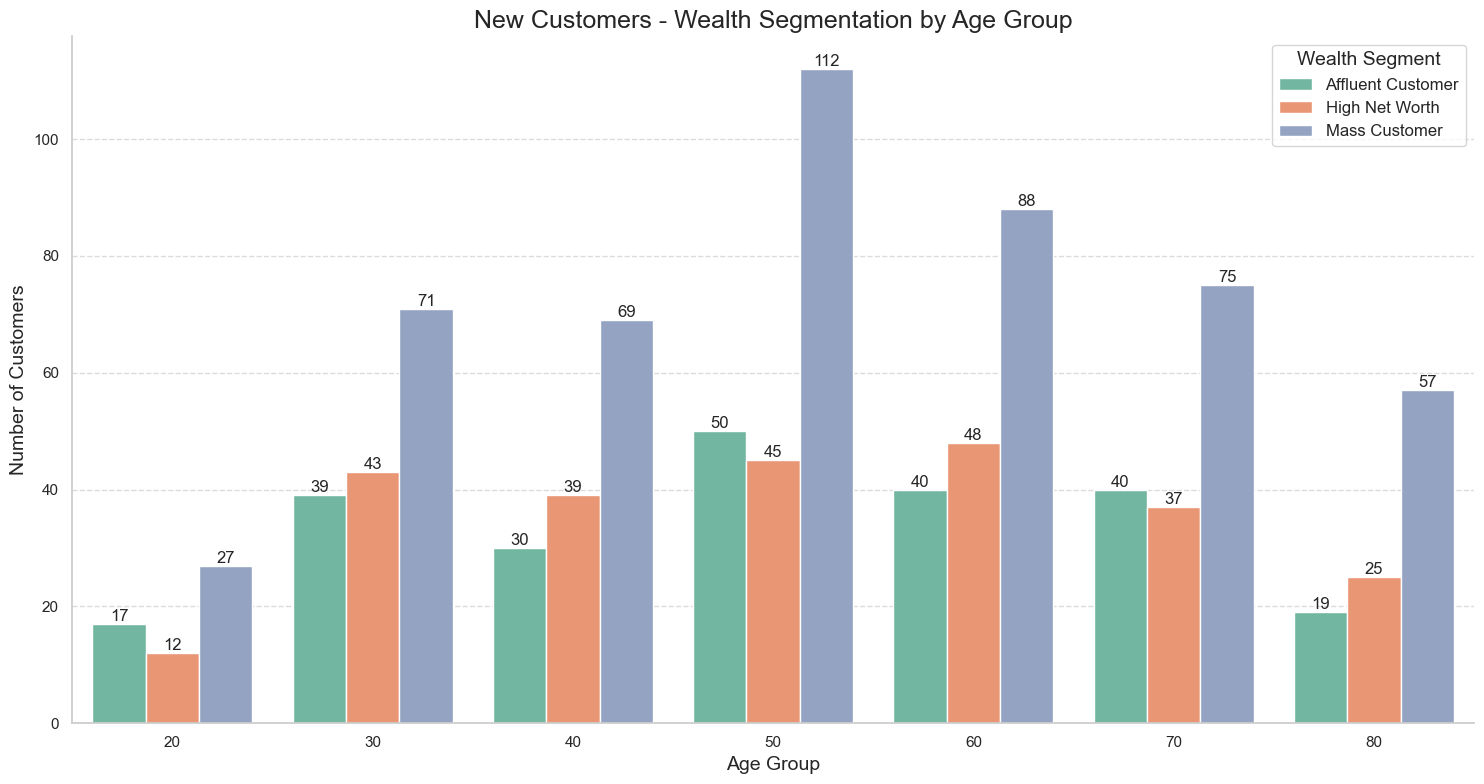

In [46]:
plt.figure(figsize=(15,8), facecolor='white')

# Plot with 'Number_of_Customers' instead of 0
ax = sns.barplot(x='age_group', y='number_of_customers', hue='wealth_segment', data=wealth_age_seg_new, palette='Set2')

plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.title('New Customers - Wealth Segmentation by Age Group', fontsize=18)

sns.despine()

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=12)

plt.legend(title='Wealth Segment', title_fontsize=14, fontsize=12, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In all the age groups the most number of customers are **Mass Customers**. The 2nd largest customer base being the **High Net Worth** group.
In the age group 40-49 the **Affluent Customer** group outperforms **High Net Worth** group

### Old Customers

Similar treand (like that of **New Customers**) is observed among **Old Customers**

In [47]:
wealth_age_seg_old = cust_trans_rfm.groupby(['wealth_segment', 'age_group']).size().reset_index()

In [48]:
wealth_age_seg_old

,wealth_segment,age_group,0
0,Affluent Customer,20,276
1,Affluent Customer,30,880
2,Affluent Customer,40,1093
3,Affluent Customer,50,1280
4,Affluent Customer,60,878
5,Affluent Customer,70,298
6,Affluent Customer,80,5
7,Affluent Customer,90,10
8,High Net Worth,20,262
9,High Net Worth,30,859


In [49]:
wealth_age_seg_old.rename(columns = {0 : 'number_of_customers'}, inplace = True)

In [50]:
wealth_age_seg_old

,wealth_segment,age_group,number_of_customers
0,Affluent Customer,20,276
1,Affluent Customer,30,880
2,Affluent Customer,40,1093
3,Affluent Customer,50,1280
4,Affluent Customer,60,878
5,Affluent Customer,70,298
6,Affluent Customer,80,5
7,Affluent Customer,90,10
8,High Net Worth,20,262
9,High Net Worth,30,859


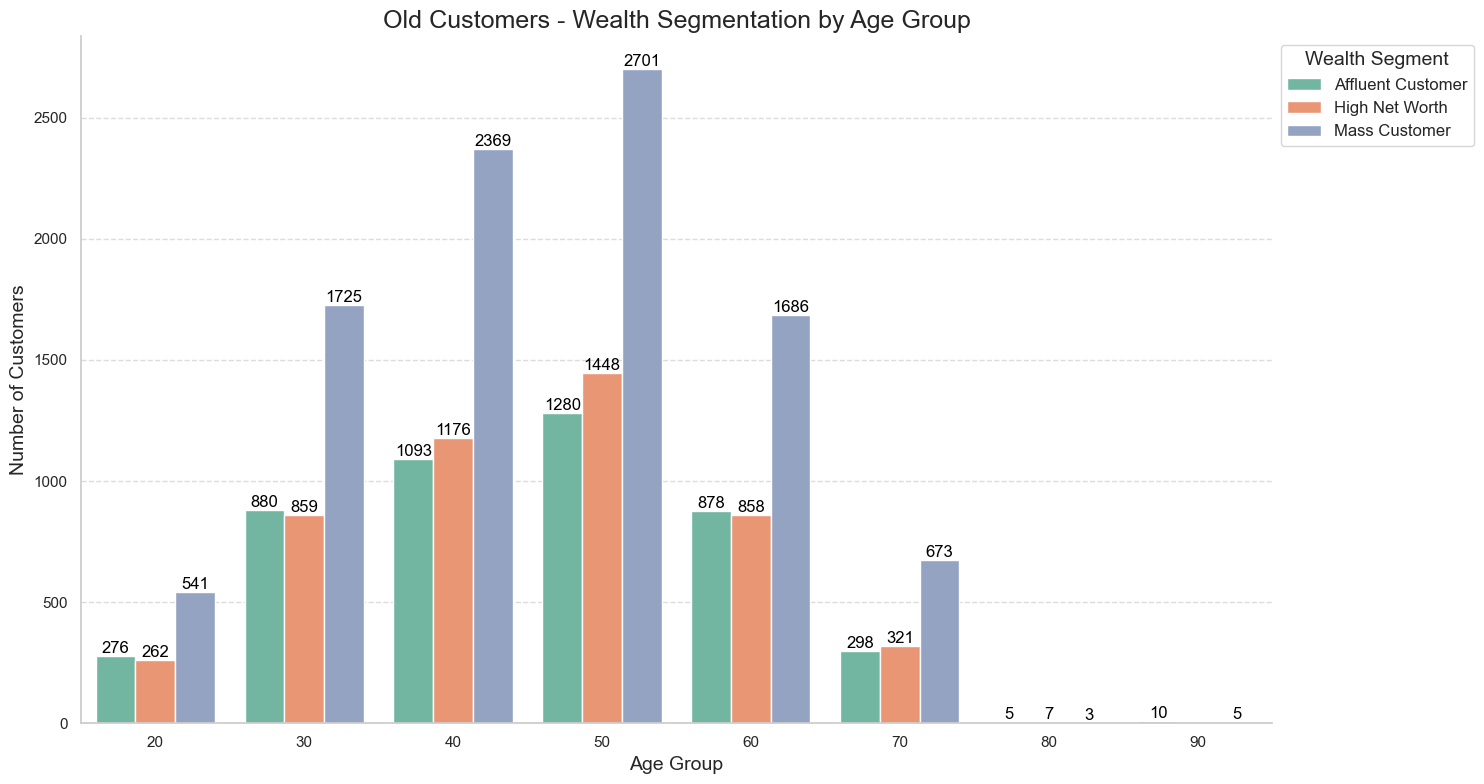

In [51]:
plt.figure(figsize=(15, 8), facecolor='white')

# Plot with 'number_of_customers'
ax = sns.barplot(x='age_group', y='number_of_customers', hue='wealth_segment', data=wealth_age_seg_old, palette='Set2')

# Customize plot labels and title
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.title('Old Customers - Wealth Segmentation by Age Group', fontsize=18)

# Remove the top and right spines
sns.despine()

# Add data labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=12, color='black')

# Customize legend and place it in the upper left corner, adjust position if needed
plt.legend(title='Wealth Segment', title_fontsize=14, fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

# Add a grid to the y-axis for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optimize the layout
plt.tight_layout()

# Show the plot
plt.show()

## 3.5. Car owner across each State

The customer base of the automobile bike company lies in **New South Wales**, **Queensland** and **Victoria**.
In **New South Wales (NSW)** it seems there is a greater amount of people who donot own a car. In **Victoria (VIC)** the proportion is evenly split. However in **Queensland (QLD)** there are relatively more people who own the car.

In [52]:
# Loading the Customer Address Dataset.

cust_addr_info = pd.read_csv('CustomerAddress_Cleaned.csv')

In [53]:
# Merging the RFM data with Customer Address dataset.

cust_trans_addr = pd.merge(cust_trans_rfm , cust_addr_info, left_on = 'customer_id', right_on = 'customer_id', how='inner')

In [54]:
print("RFM table Records count : {}\nAddress Table Records count :{}".format(cust_trans_rfm.shape[0] ,cust_addr_info.shape[0]))

RFM table Records count : 19354
Address Table Records count :3999


In [55]:
state_car_owners = cust_trans_addr[['state', 'owns_car', 'customer_id']].drop_duplicates().groupby(['state', 'owns_car']).size().reset_index()

In [56]:
state_car_owners.rename(columns = {0 : 'number_of_customers'}, inplace=True)
state_car_owners

,state,owns_car,number_of_customers
0,NSW,No,889
1,NSW,Yes,935
2,QLD,No,365
3,QLD,Yes,363
4,VIC,No,435
5,VIC,Yes,425


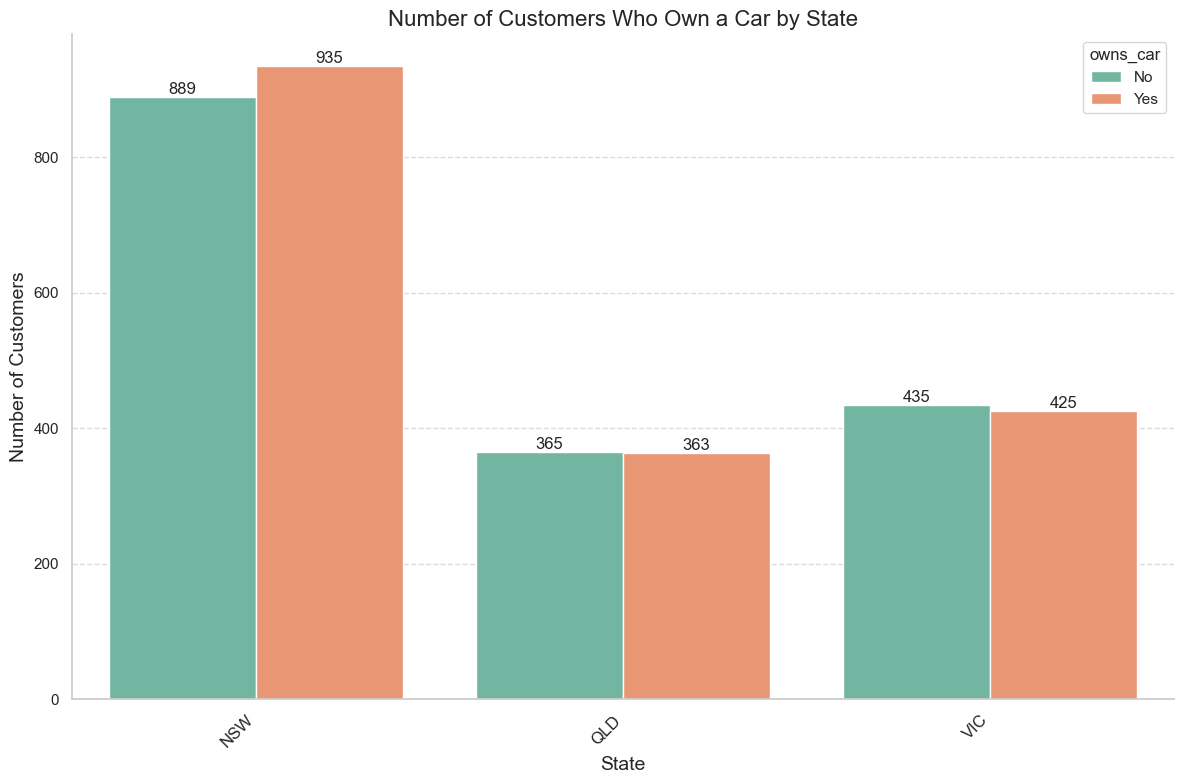

In [57]:
# Increase figure size for better readability
plt.figure(figsize=(12, 8))

# Create barplot for Number of Customers who own a car by state
ax = sns.barplot(x='state', y='number_of_customers', hue='owns_car', data=state_car_owners, palette='Set2')

# Set custom labels and title with larger font sizes
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.title('Number of Customers Who Own a Car by State', fontsize=16)

# Rotate x-axis labels to improve readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Remove the top and right spines
sns.despine()

# Add data labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Add label only for visible bars
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=12)

# Add grid to y-axis for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()

**NSW** has the largest number of people that donot own a car. It seems that a higher amount of data is collected from **NSW** compared to other states. In **QLD** the distribution between customers having a car or not having is even. In **Victoria** the number is split evenly. Both the numbers are significantly lower than that of **NSW**/

# 4. RFM Analysis Scatter Plots

## 4.1. Recency vs Monetary

The chart shows that customers who purchased recently generated more revenue than customers who visited long time ago. Customers from recent past (50-100) days generated a moderate revenue. Customers who visited 200 days ago generated a low revenue.

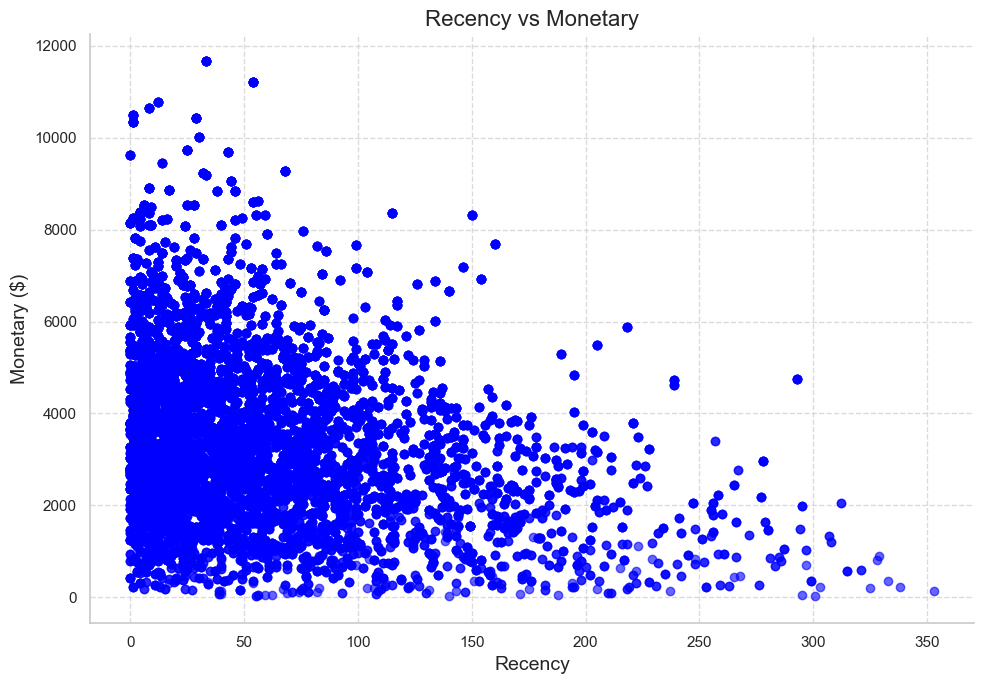

In [58]:
# Increase figure size for better readability
plt.figure(figsize=(10, 7))

# Scatter plot of recency vs monetary
plt.scatter(x=cust_trans_rfm['recency'], y=cust_trans_rfm['monetary'], color='blue', alpha=0.6)

# Set labels and title with larger font sizes
plt.xlabel('Recency', fontsize=14)
plt.ylabel('Monetary ($)', fontsize=14)
plt.title('Recency vs Monetary', fontsize=16)

# Remove the top and right spines for a cleaner look
sns.despine()

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Optimize layout to fit everything well
plt.tight_layout()

# Show the plot
plt.show()

## 4.2 Frequency vs Monetary

Customers classified as "Platinum Custoers" , "Very Loyal" and "Becoming Loyal" visit frequently, which correlated with increased revenue for the business.

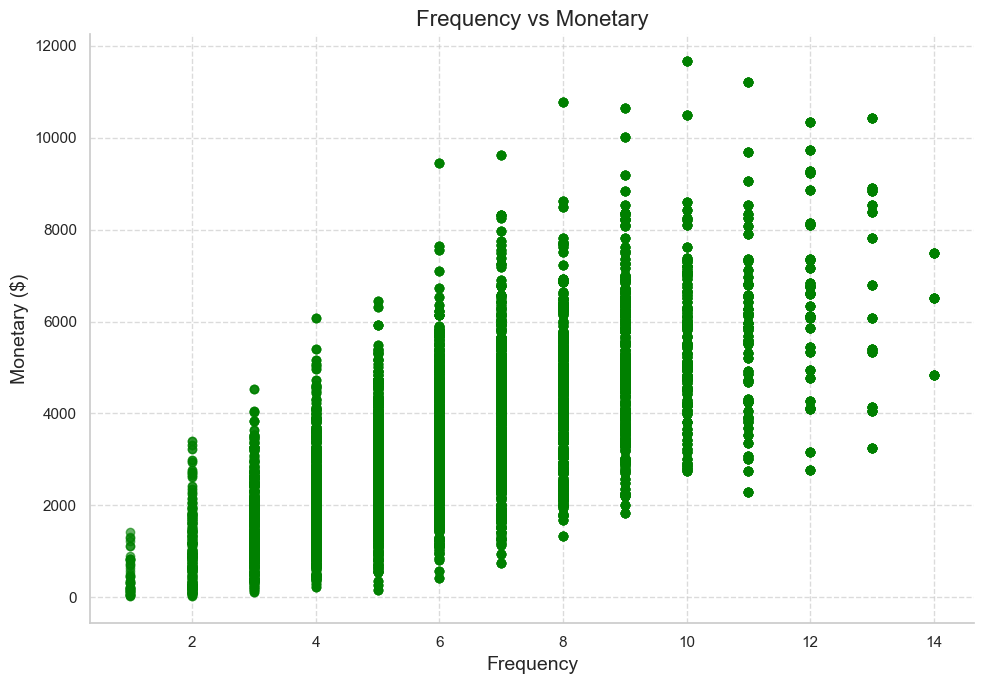

In [59]:
# Increase figure size for better readability
plt.figure(figsize=(10, 7))

# Scatter plot for frequency vs monetary
plt.scatter(x=cust_trans_rfm['frequency'], y=cust_trans_rfm['monetary'], color='green', alpha=0.6)

# Set axis labels and title
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Monetary ($)', fontsize=14)
plt.title('Frequency vs Monetary', fontsize=16)

# Remove the top and right spines for a cleaner look
sns.despine()

# Add gridlines for better visual interpretation
plt.grid(True, linestyle='--', alpha=0.7)

# Optimize layout to fit the elements well
plt.tight_layout()

# Display the plot
plt.show()

# 5. Customer Segment Distribution

**Finally we can plot the Number of Customers present under a Customer Segment.**

In [60]:
# Calculating the number of unique customers under a customer title.

cust_per_title = cust_trans_rfm[['detail_cust_title', 'customer_id','rank']].drop_duplicates().groupby(
    ['detail_cust_title','rank']).size().reset_index().sort_values('rank')

In [61]:
cust_per_title.rename(columns={0:'Number of Customers'}, inplace=True)
cust_per_title

,detail_cust_title,rank,Number of Customers
7,Platinum Customer,1,164
10,Very Loyal,2,181
1,Becoming Loyal,3,344
9,Recent Customer,4,357
8,Potential Customer,5,340
4,Late Bloomer,6,332
5,Loosing Customer,7,333
3,High Risk Customer,8,371
0,Almost Lost Customer,9,315
2,Evasive Customer,10,388


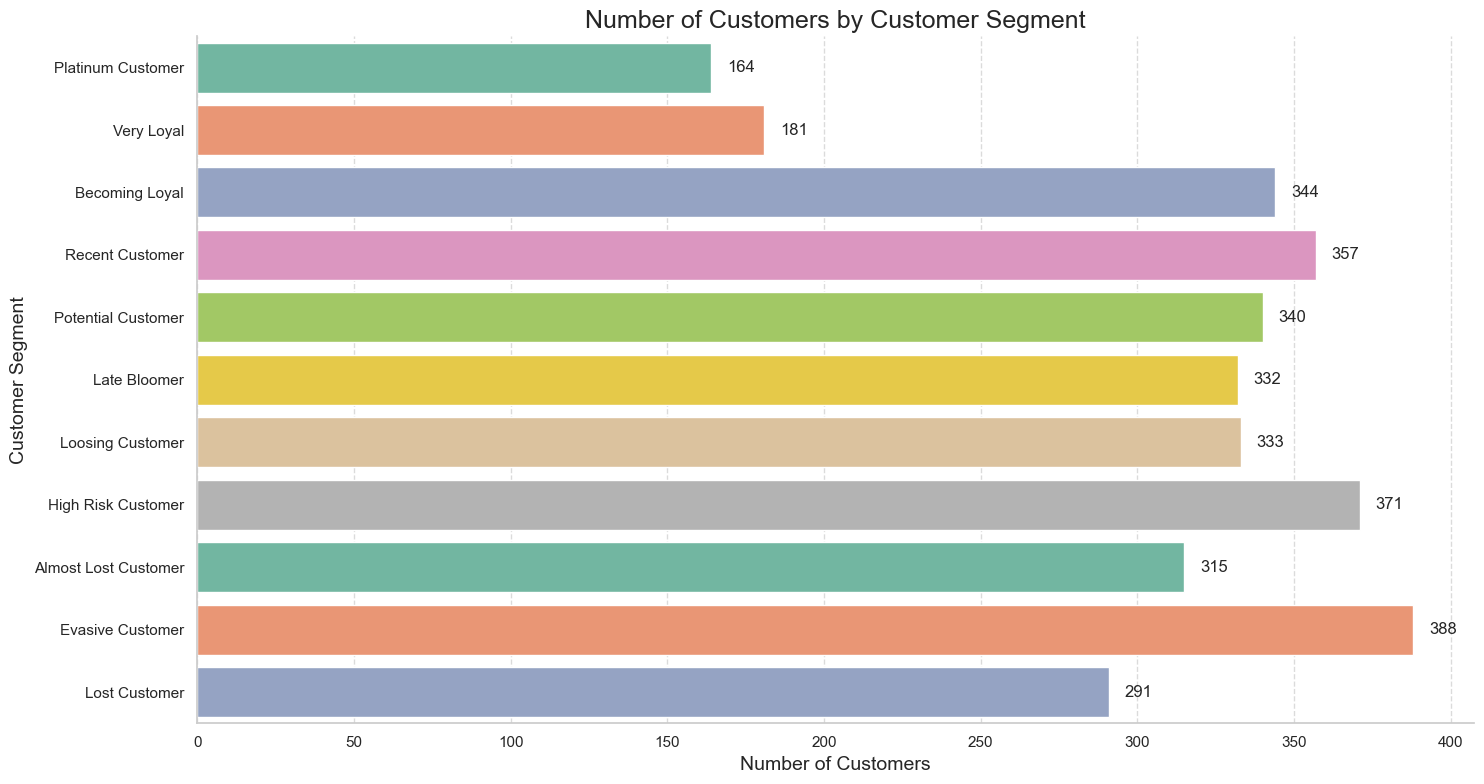

In [62]:
# Plotting the Number of Customers by Customer Segment
plt.figure(figsize=(15, 8))

# Bar plot with horizontal bars
ax = sns.barplot(y='detail_cust_title', x='Number of Customers', data=cust_per_title, palette='Set2')

# Set labels and title
plt.xlabel('Number of Customers', fontsize=14)
plt.ylabel('Customer Segment', fontsize=14)
plt.title('Number of Customers by Customer Segment', fontsize=18)

# Remove the top and right spines for a cleaner look
sns.despine()

# Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add data labels on the bars
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width)}', (width + 5, p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=12)

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()